This program attempts to optimize a users portfolio using the Efficient frontier

In [1]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
#Get the stock symbols/ tickers in the portfolio
#FAANG
assets = ['FB','AMZN','AAPL','NFLX','GOOG']


In [3]:
#Assign weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
#Get the stocks / portfolio starting date
stockStartDate = '2013-01-01'

In [5]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-11-30'

In [6]:
pip install pandas_datareader --upgrade

In [7]:
#Create the dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close priceof the stock into the dataframe
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

In [8]:
#Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.960690,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.746607,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.280140,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.184376,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.227932,13.880000,365.280823
...,...,...,...,...,...
2021-11-22,341.010010,3572.570068,161.020004,659.200012,2941.570068
2021-11-23,337.250000,3580.040039,161.410004,654.059998,2935.139893
2021-11-24,341.059998,3580.409912,161.940002,658.289978,2934.350098


<function matplotlib.pyplot.show>

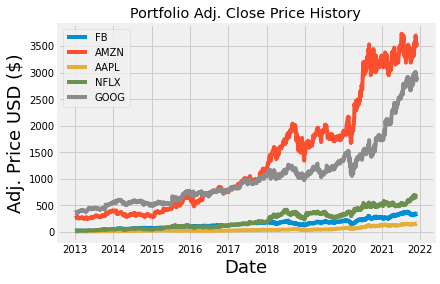

In [9]:
#Visually show the stock/portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize =18)
plt.ylabel('Adj. Price USD ($)',fontsize= 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show

In [10]:
#Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027854,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-11-22,-0.012424,-0.028287,0.002927,-0.028874,-0.019166
2021-11-23,-0.011026,0.002091,0.002422,-0.007797,-0.002186
2021-11-24,0.011297,0.000103,0.003284,0.006467,-0.000269


In [11]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.115257,0.053090,0.044020,0.054652,0.049335
AMZN,0.053090,0.090532,0.039441,0.060347,0.046274
AAPL,0.044020,0.039441,0.079539,0.034772,0.037925
NFLX,0.054652,0.060347,0.034772,0.200056,0.046973
GOOG,0.049335,0.046274,0.037925,0.046973,0.065112


In [12]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05936612793902773

In [13]:
# Calculate the portfolio volatility aka std. deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24365165285511142

In [14]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3549900501001559

In [15]:
#Show the expected annual return, volatility(risk), and variance

percent_var = str( round (port_variance, 2)* 100) + '%'
percent_vols = str(round (port_volatility, 2)* 100) + '%'
percent_ret = str( round (portfolioSimpleAnnualReturn, 2)* 100)+ '%'

print('Expected annual return: '+ percent_ret)
print('Annual volaitlity / risk: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 35.0%
Annual volaitlity / risk: 24.0%
Annual variance: 6.0%


In [16]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 4.2 MB/s 
     |████████████████████████████████| 2.8 MB 19.7 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

Portfolio Optimization

In [18]:
#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu =  expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.08679), ('AMZN', 0.23363), ('AAPL', 0.2838), ('NFLX', 0.33805), ('GOOG', 0.05774)])
Expected annual return: 39.2%
Annual volatility: 26.3%
Sharpe Ratio: 1.42


(0.39219411941375215, 0.26282277005326854, 1.4161410723215357)

In [19]:
0.08864+0.2346+0.28237+0.34477+0.04963

1.00001

In [20]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 20000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'FB': 5, 'AMZN': 1, 'AAPL': 32, 'NFLX': 10, 'GOOG': 1}
Funds remaining: $59.92


Thank you